In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.3.1'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

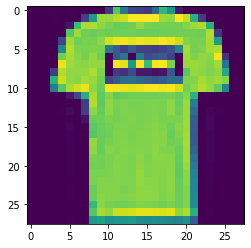

In [6]:
plt.imshow(X_train_full[1])

In [7]:
y_train_full[1]

0

Link: https://keras.io/api/datasets/fashion_mnist/

# Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [8]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_names[y_train_full[1]]

'T-shirt/top'

In [10]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [11]:
# Data Normalization
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [12]:
# Split Data into Train, Validation & Test
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
np.random.seed(42)
tf.random.set_seed(42)
# Same results if we run any time -> setting random seed as same number

In [15]:
model = keras.models.Sequential() # Initialize Keras Sequential Model
model.add(keras.layers.Flatten(input_shape=[28,28])) ## Flatten 2D matrix into 1D
model.add(keras.layers.Dense(300, activation = "relu")) # 300 neurons in Hidden Layer 1 with Rectified Linear Unit Activation
model.add(keras.layers.Dense(100, activation = "relu")) # 100 neurons in HL2 with ReLU
model.add(keras.layers.Dense(10, activation = "softmax")) # MultiClass Classification -> Softmax activation at End
# Softmax equates sum of all probabilities of products into 1

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 784(variables) * 300(neurons) + 300(bias) = 235500(parameters)
# 300 * 100 + 100 = 30100(params)

In [18]:
!pip3 install graphviz pydot pydot-ng

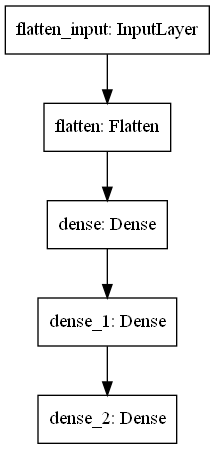

In [19]:
import pydot
keras.utils.plot_model(model)

# graph = pydot.Dot(graph_type='digraph')
# node_a = pydot.Node("Node A", style="filled", fillcolor="red")
# node_b = pydot.Node("Node B", style="filled", fillcolor="green")
# node_c = pydot.Node("Node C", style="filled", fillcolor="#0000ff")
# node_d = pydot.Node("Node D", style="filled", fillcolor="#976856")
# graph.add_node(node_a)
# graph.add_node(node_b)
# graph.add_node(node_c)
# graph.add_node(node_d)
# graph.add_edge(pydot.Edge(node_a, node_b))
# graph.add_edge(pydot.Edge(node_b, node_c))
# graph.add_edge(pydot.Edge(node_c, node_d))
# graph.add_edge(pydot.Edge(node_d, node_a, label="and back we go again", labelfontcolor="#009933", fontsize="10.0", color="blue"))
# graph.write_png('C:\DataDrive\example2_graph.png')

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
weights.shape

(784, 300)

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4126 - accuracy: 0.8565 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3623 - val_accuracy:

In [27]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
model_history.history

{'loss': [0.7236780524253845,
  0.4843234419822693,
  0.43926194310188293,
  0.4125828742980957,
  0.39403125643730164,
  0.375262051820755,
  0.3633483052253723,
  0.35191380977630615,
  0.34158772230148315,
  0.3323535919189453,
  0.32430601119995117,
  0.3150706887245178,
  0.3082892894744873,
  0.30243635177612305,
  0.2949575185775757,
  0.2892157733440399,
  0.28408506512641907,
  0.27800416946411133,
  0.27291247248649597,
  0.2677637040615082,
  0.26263296604156494,
  0.25784388184547424,
  0.2538001835346222,
  0.24847276508808136,
  0.24469007551670074,
  0.240883931517601,
  0.23655784130096436,
  0.23311829566955566,
  0.22872237861156464,
  0.22548694908618927],
 'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8454181551933289,
  0.8565454483032227,
  0.8617818355560303,
  0.8677454590797424,
  0.8714545369148254,
  0.874963641166687,
  0.8791636228561401,
  0.8819454312324524,
  0.8835272789001465,
  0.8866181969642639,
  0.8885454535484314,
  0.891363620758056

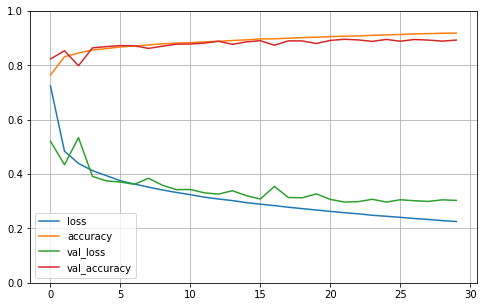

In [29]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8827


[0.33773481845855713, 0.8827000260353088]

In [31]:
X_new = X_test[:3]

In [32]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


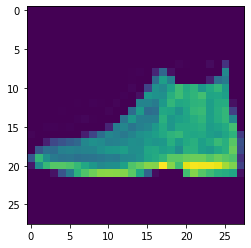

In [37]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


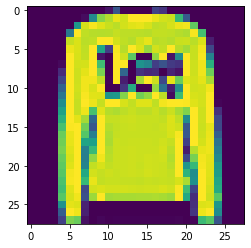

In [38]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


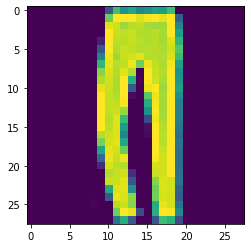

In [39]:
print(plt.imshow(X_test[2]))